In [1]:
%load_ext autoreload
%autoreload 2
from recognizer import TextRecognizer
tr = TextRecognizer()

File exists: /home/giangnv/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


In [3]:
data = tr.load_detection_json("f966528d19f24852ade12a308e00e9d7.json")

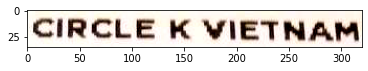

circle k vietnam


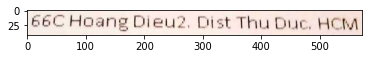

66C Hoang Dieu2. Dist Thu Duc, HCM


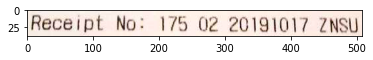

Receipt No: 175 02 20191017 ZNSU


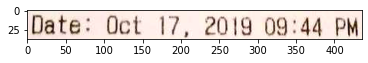

Date: Oct 17, 2019 09:44 PM


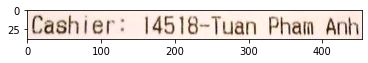

Cashier: 14518?Tuan Pham Anh


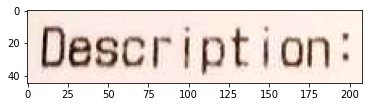

Description:


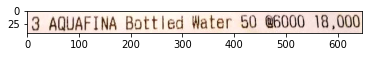

3 AQUAFINA Bottled Water 50 Q6000 18,000


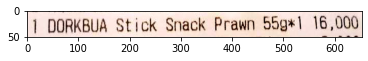

1 DORKBUA Stick Snack Prawn 55g%1 16,000


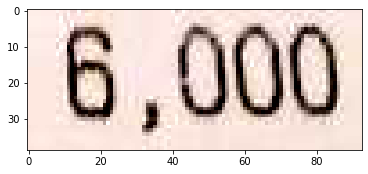

6,000


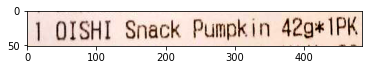

1 OISHI Snack Pumpkin 42g% IPK


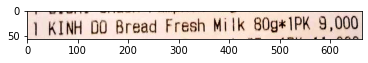

" KINH DO Bread Fresh Mi Ik 80g% 1PK 9,000


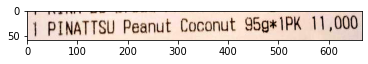

1 PINATTSu Peanut Coconut 95g% IPK 11,000


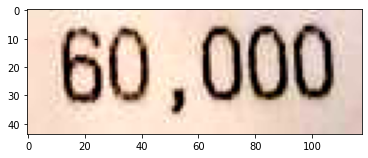

60,000


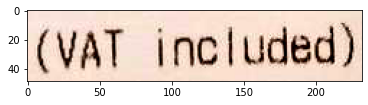

(VAT included)


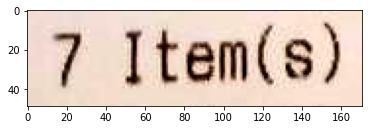

7 Item(s)


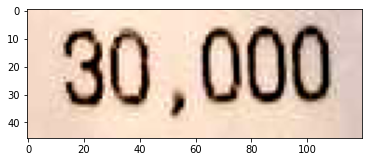

30,000


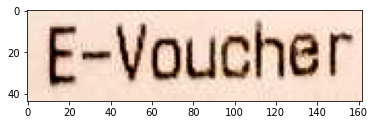

E-Voucher


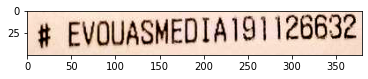

4 EVOUASMEDIA 191 126632


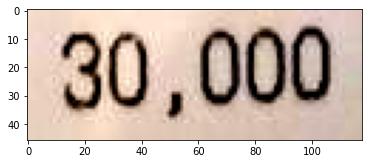

30,000


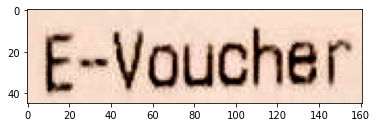

E-Voucher


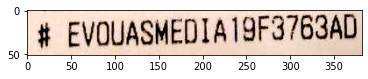

4 EVOUASMEDIA 19F3763AD


In [19]:
data, scripts = tr.recognize(data=data)

In [5]:
scripts

['circle k vietnam',
 '66C Hoang Dieu2. Dist Thu Duc, HCM',
 'Receipt No: 175 02 20191017 ZNSU',
 'Date: Oct 17, 2019 09:44 PM',
 'Cashier: 14518?Tuan Pham Anh',
 'Description:',
 '3 AQUAFINA Bottled Water 50 Q6000 18,000',
 '1 DORKBUA Stick Snack Prawn 55g%1 16,000',
 '6,000',
 '1 OISHI Snack Pumpkin 42g% IPK',
 '" KINH DO Bread Fresh Mi Ik 80g% 1PK 9,000',
 '1 PINATTSu Peanut Coconut 95g% IPK 11,000',
 '60,000',
 '(VAT included)',
 '7 Item(s)',
 '30,000',
 'E-Voucher',
 '4 EVOUASMEDIA 191 126632',
 '30,000',
 'E-Voucher',
 '4 EVOUASMEDIA 19F3763AD']

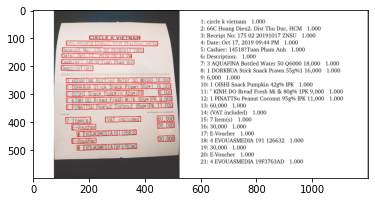

In [21]:
tr.draw_result(data=data)

In [20]:
data_1 = data

In [23]:
from pyvi import ViTokenizer, ViPosTagger 
from tqdm import tqdm
import numpy as np
import gensim 

keywords = ["vat included", 
            "total vat",
            "tong vat", 
            "tong tien thanh toan",
            "thanh tien",
            "tong cong",
            "tong",
            "total"]

def clear_text(scipt):
    text = gensim.utils.simple_preprocess(scipt)
    text = " ".join(word for word in text)
    return text

def search_key_words(text,
                    keywords=keywords):
    for i, keyword in enumerate(keywords):
        if keyword in text:
            return i
    return -1

def get_main_index(data, 
                    keywords=keywords):
    boxes = data["boxes"]
    texts = []
    for box in boxes:
        script = box["script"]
        text = clear_text(script)
        texts.append(text)
    index = len(keywords)
    index_text = len(texts)
    for i, text in enumerate(texts):
        keyword_index = search_key_words(text)
        if index > keyword_index and keyword_index != -1:
            index = keyword_index
            index_text = i
        data["boxes"][i]["isTotal"] = False
    data["boxes"][index_text]["isTotal"] = True
    
    key_word = data["boxes"][index_text]["script"]
    data["boxes"][index_text]["script"] = f"**{key_word}**"
    return keywords[index], index_text

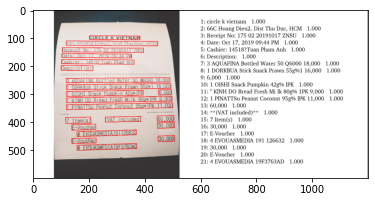

In [24]:
get_main_index(data_1)
tr.draw_result(data=data_1)